In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the data

In [2]:
crime = pd.read_csv('formatted.csv', sep='\s*,\s*',encoding='latin-1',engine='python', na_values=["?"])

In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Columns: 151 entries, Unnamed: 0 to Division
dtypes: float64(145), int64(1), object(5)
memory usage: 2.6+ MB


In [4]:
crime.head()

Unnamed: 0            communityName statecode  countyCode  communityCode  \
0           0  BerkeleyHeightstownship        NJ        39.0         5320.0   
1           1            Bricktownship        NJ        29.0         7420.0   
2           2     ScotchPlainstownship        NJ        39.0        66060.0   
3           3         Gallowaytownship        NJ         1.0        25560.0   
4           4     NewProvidenceborough        NJ        39.0        51810.0   

   fold  population  householdsize  racepctblack  racePctWhite  ...  \
0   1.0     11980.0           3.10          1.37         91.78  ...   
1   1.0     66473.0           2.66          0.63         97.81  ...   
2   1.0     21160.0           2.79         11.10         83.79  ...   
3   1.0     23330.0           2.94          7.36         88.58  ...   
4   1.0     11439.0           2.70          0.54         94.18  ...   

   larcPerPop  autoTheft  autoTheftPerPop  arsons  arsonsPerPop  \
0     1132.08       16.0           131.26     2.0         16.41   
1     1773.32       98.0           143.15    14.0         20.45   
2     1271.19       89.0           409.91     2.0          9.21   
3     2332.30       46.0           192.61     7.0         29.31   
4      768.21       18.0           148.69     2.0         16.52   

   ViolentCrimesPerPop  nonViolPerPop       State     Region         Division  
0                41.02        1394.59  New Jersey  Northeast  Middle Atlantic  
1               131.47        2543.13  New Jersey  Northeast  Middle Atlantic  
2               115.14        2160.10  New Jersey  Northeast  Middle Atlantic  
3               251.24        3668.03  New Jersey  Northeast  Middle Atlantic  
4                49.56        1032.55  New Jersey  Northeast  Middle Atlantic  

[5 rows x 151 columns]

In [5]:
crime.columns

Index(['Unnamed: 0', 'communityName', 'statecode', 'countyCode',
       'communityCode', 'fold', 'population', 'householdsize', 'racepctblack',
       'racePctWhite',
       ...
       'larcPerPop', 'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop',
       'ViolentCrimesPerPop', 'nonViolPerPop', 'State', 'Region', 'Division'],
      dtype='object', length=151)

# Explore the data: Histograms

Check out min, mx, mean, median, and std for non-violent crimes

In [6]:
print('Minimum for violent crimes: ', crime['ViolentCrimesPerPop'].min())
print('Maximum for violent crimes: ', crime['ViolentCrimesPerPop'].max())
print('Mean for violent crimes: ', crime['ViolentCrimesPerPop'].mean())
print('STD for violent crimes: ', crime['ViolentCrimesPerPop'].std())
print('Median for violent crimes: ', crime['ViolentCrimesPerPop'].median())

Minimum for violent crimes:  0.0
Maximum for violent crimes:  4877.06
Mean for violent crimes:  589.0789217652957
STD for violent crimes:  614.7845182453359
Median for violent crimes:  374.06


Check out min, mx, mean, median, and std for non-violent crimes

In [7]:
print('Minimum for non-violent crimes: ', crime['nonViolPerPop'].min())
print('Maximum for non-violent crimes: ', crime['nonViolPerPop'].max())
print('Mean for non-violent crimes: ', crime['nonViolPerPop'].mean())
print('STD for non-violent crimes: ', crime['nonViolPerPop'].std())
print('Median for non-violent crimes: ', crime['nonViolPerPop'].median())

Minimum for non-violent crimes:  116.79
Maximum for non-violent crimes:  27119.76
Mean for non-violent crimes:  4908.241803588295
STD for non-violent crimes:  2739.7089005280213
Median for non-violent crimes:  4425.450000000001


Violent crime density

Text(0, 0.5, 'count')

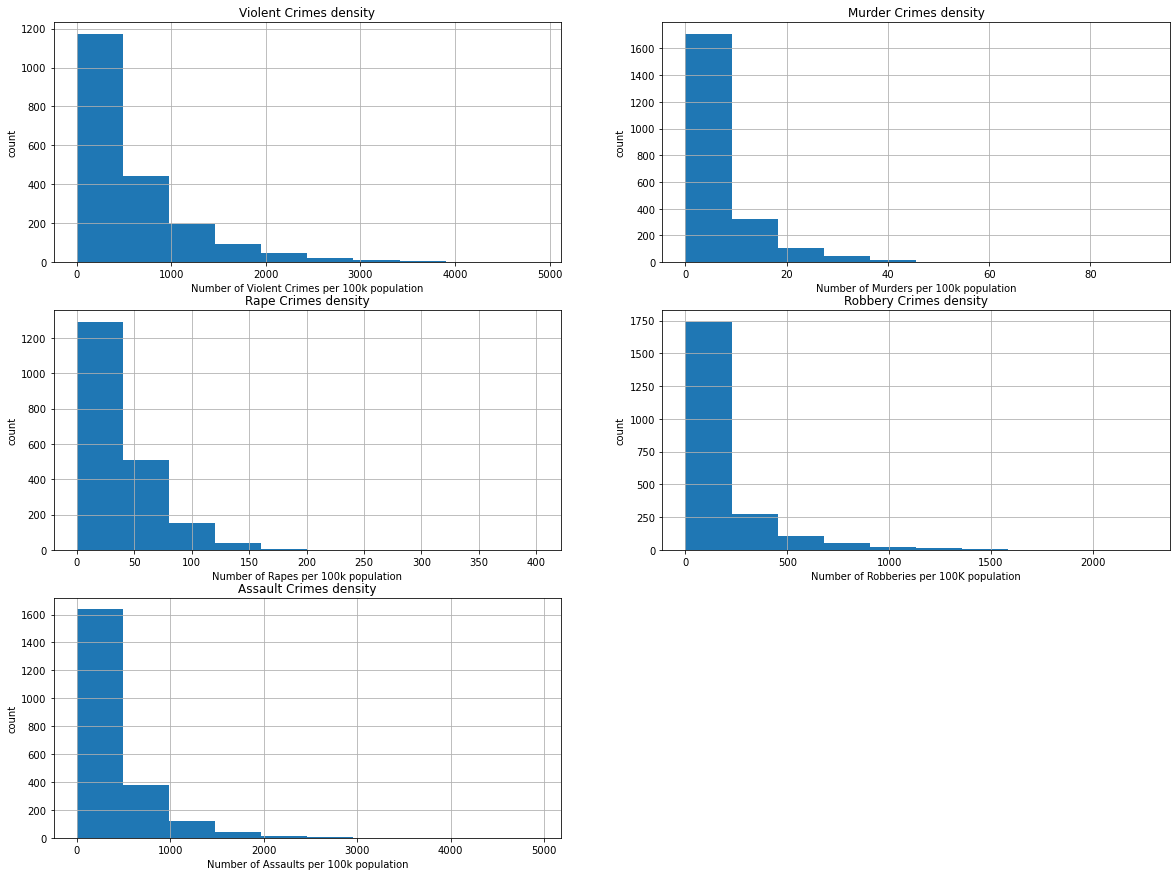

In [8]:
plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
plt.title('Violent Crimes density')
crime['ViolentCrimesPerPop'].hist()
plt.xlabel('Number of Violent Crimes per 100k population')
plt.ylabel('count')

plt.subplot(3,2,2)
plt.title('Murder Crimes density')
crime['murdPerPop'].hist()
plt.xlabel('Number of Murders per 100k population')
plt.ylabel('count')

plt.subplot(3,2,3)
plt.title('Rape Crimes density')
crime['rapesPerPop'].hist()
plt.xlabel('Number of Rapes per 100k population')
plt.ylabel('count')

plt.subplot(3,2,4)

plt.title('Robbery Crimes density')
crime['robbbPerPop'].hist()
plt.xlabel('Number of Robberies per 100K population')
plt.ylabel('count')

plt.subplot(3,2,5)
plt.title('Assault Crimes density')
crime['assaultPerPop'].hist()
plt.xlabel('Number of Assaults per 100k population')
plt.ylabel('count')

Non-violent crime density

Text(0, 0.5, 'Counts')

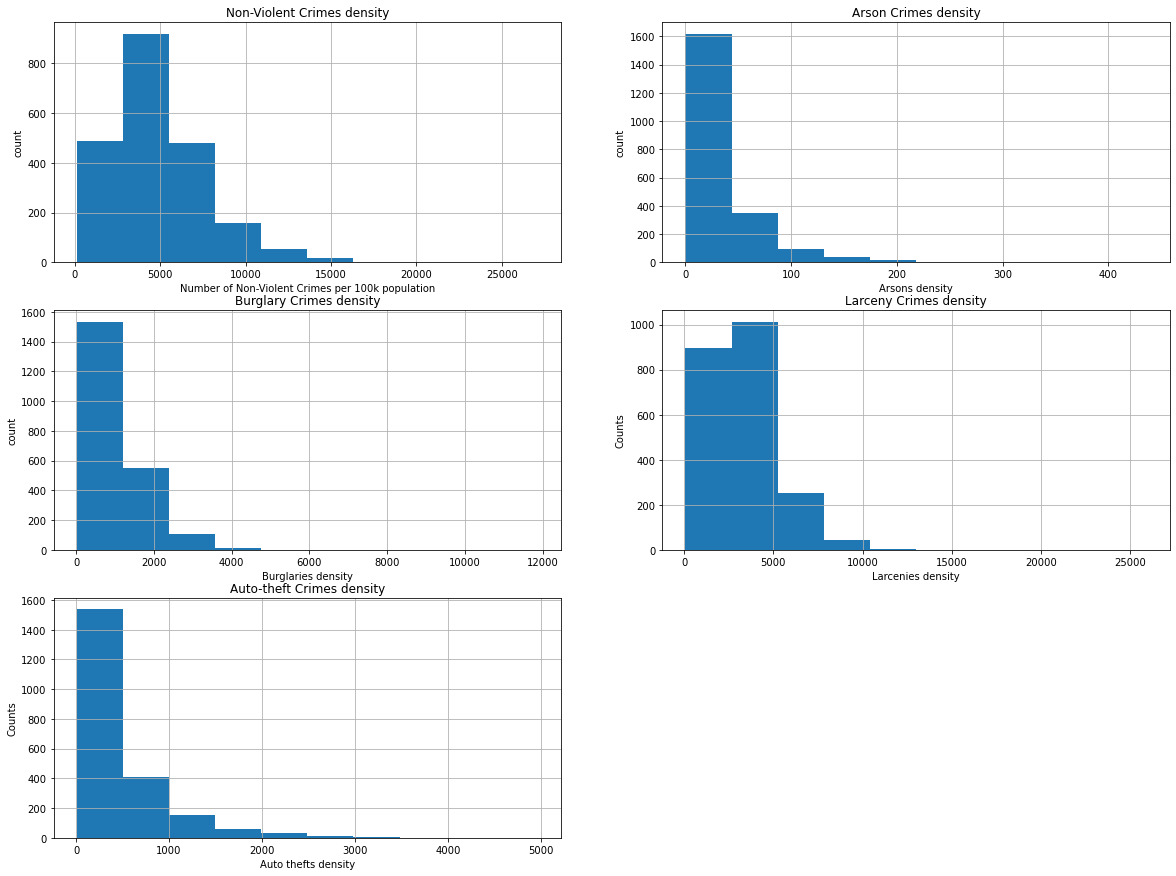

In [9]:
plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
plt.title('Non-Violent Crimes density')
crime['nonViolPerPop'].hist()
plt.xlabel('Number of Non-Violent Crimes per 100k population')
plt.ylabel('count')

plt.subplot(3,2,2)
plt.title('Arson Crimes density')
crime['arsonsPerPop'].hist()
plt.xlabel('Arsons density')
plt.ylabel('count')

plt.subplot(3,2,3)
plt.title('Burglary Crimes density')
crime['burglPerPop'].hist()
plt.xlabel('Burglaries density')
plt.ylabel('count')

plt.subplot(3,2,4)
plt.title('Larceny Crimes density')
crime['larcPerPop'].hist()
plt.xlabel('Larcenies density')
plt.ylabel('Counts')

plt.subplot(3,2,5)
plt.title('Auto-theft Crimes density')
crime['autoTheftPerPop'].hist()
plt.xlabel('Auto thefts density')
plt.ylabel('Counts')

This is a smart way of visualizing density for each type of crime and see which one is most widespread

Check per capita income for each race

Text(0, 0.5, 'count')

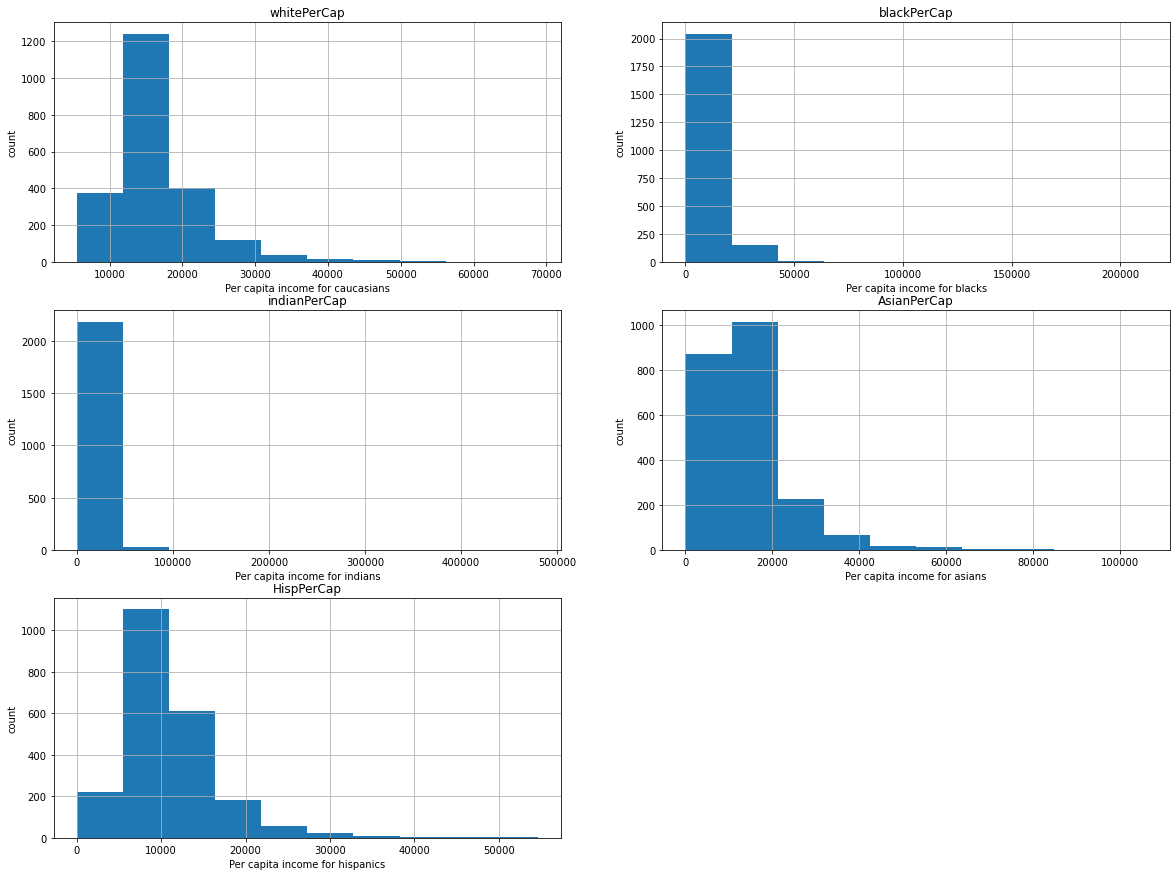

In [10]:
plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
plt.title('whitePerCap')
crime['whitePerCap'].hist()
plt.xlabel('Per capita income for caucasians')
plt.ylabel('count')

plt.subplot(3,2,2)
plt.title('blackPerCap')
crime['blackPerCap'].hist()
plt.xlabel('Per capita income for blacks')
plt.ylabel('count')

plt.subplot(3,2,3)
plt.title('indianPerCap')
crime['indianPerCap'].hist()
plt.xlabel('Per capita income for indians')
plt.ylabel('count')

plt.subplot(3,2,4)
plt.title('AsianPerCap')
crime['AsianPerCap'].hist()
plt.xlabel('Per capita income for asians')
plt.ylabel('count')

plt.subplot(3,2,5)
plt.title('HispPerCap')
crime['HispPerCap'].hist()
plt.xlabel('Per capita income for hispanics')
plt.ylabel('count')

# Exploring data through linear regression plots

Plot linear regression plots for %age and non-violent crimes

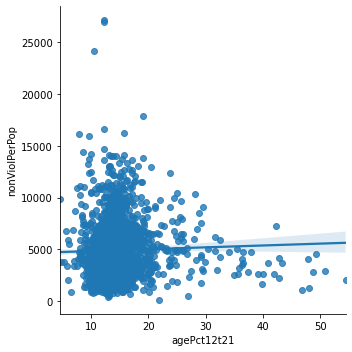

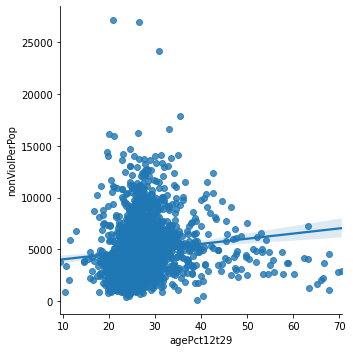

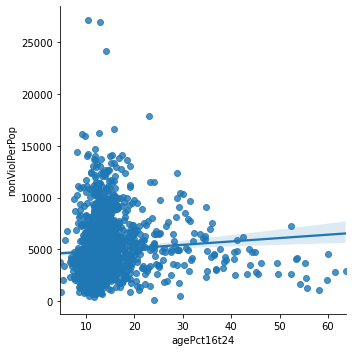

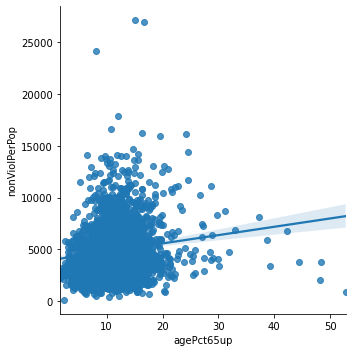

In [11]:
sns.lmplot(x='agePct12t21', y='nonViolPerPop', data=crime)
sns.lmplot(x='agePct12t29', y='nonViolPerPop', data=crime)
sns.lmplot(x='agePct16t24', y='nonViolPerPop', data=crime)
sns.lmplot(x='agePct65up', y='nonViolPerPop', data=crime)

In [14]:
# calculate correlation coeffcient between %age and non-violent crimes
crime1 = crime.dropna(subset=['agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', \
                              'agePop12t21', 'agePop12t29', 'agePop16t24', 'agePop65up',
                              'nonViolPerPop', 'ViolentCrimesPerPop'], how='any')
print('Correlation coefficient for ages 12-21: ', scipy.stats.pearsonr(crime1['agePct12t21'], crime1['nonViolPerPop'])[0])
print('Correlation coefficient for ages 12-29: ', scipy.stats.pearsonr(crime1['agePct12t29'], crime1['nonViolPerPop'])[0])
print('Correlation coefficient for ages 16-24: ', scipy.stats.pearsonr(crime1['agePct16t24'], crime1['nonViolPerPop'])[0])
print('Correlation coefficient for ages 65+: ', scipy.stats.pearsonr(crime1['agePct65up'], crime1['nonViolPerPop'])[0])

Correlation coefficient for ages 12-21:  0.023780025891635356
Correlation coefficient for ages 12-29:  0.11128019835681058
Correlation coefficient for ages 16-24:  0.06647804421706746
Correlation coefficient for ages 65+:  0.126582344754042


Plot linear regression plots for population age and non-violent crimes

In [13]:
crime['agePop12t21'] = crime['agePct12t21'] * crime['population']
crime['agePop12t29'] = crime['agePct12t29'] * crime['population']
crime['agePop16t24'] = crime['agePct16t24'] * crime['population']
crime['agePop65up'] = crime['agePct65up'] * crime['population']

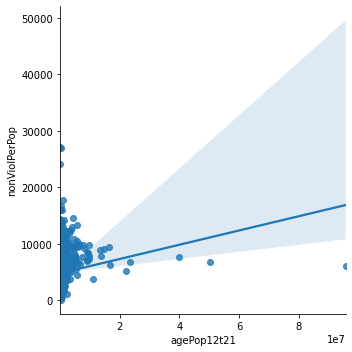

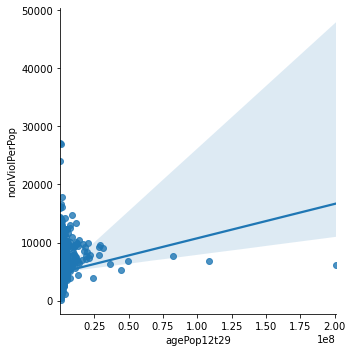

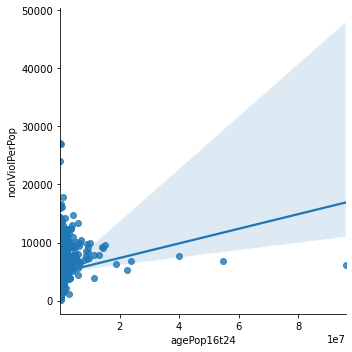

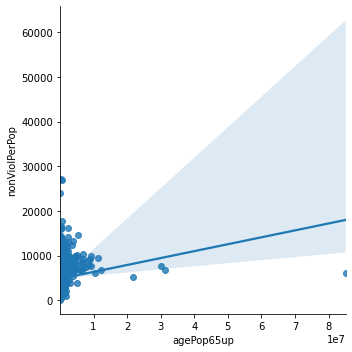

In [15]:
sns.lmplot(x='agePop12t21', y='nonViolPerPop', data=crime)
sns.lmplot(x='agePop12t29', y='nonViolPerPop', data=crime)
sns.lmplot(x='agePop16t24', y='nonViolPerPop', data=crime)
sns.lmplot(x='agePop65up', y='nonViolPerPop', data=crime)

In [16]:
# calculate correlation coefficient between population age and non-violent crimes
print('Correlation coefficient for ages 12-21: ', scipy.stats.pearsonr(crime1['agePop12t21'], crime1['nonViolPerPop'])[0])
print('Correlation coefficient for ages 12-29: ', scipy.stats.pearsonr(crime1['agePop12t29'], crime1['nonViolPerPop'])[0])
print('Correlation coefficient for ages 16-24: ', scipy.stats.pearsonr(crime1['agePop16t24'], crime1['nonViolPerPop'])[0])
print('Correlation coefficient for ages 65+: ', scipy.stats.pearsonr(crime1['agePop65up'], crime1['nonViolPerPop'])[0])

Correlation coefficient for ages 12-21:  0.1268336759071523
Correlation coefficient for ages 12-29:  0.1252028812333492
Correlation coefficient for ages 16-24:  0.13008854745491247
Correlation coefficient for ages 65+:  0.12455724077253921


Plot linear regression for % age and violent crimes

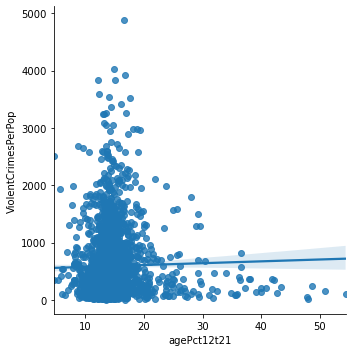

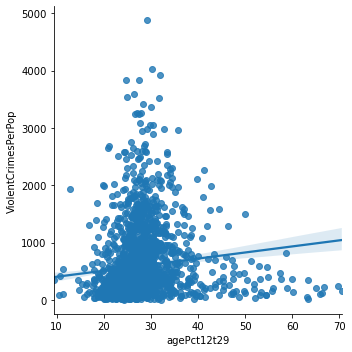

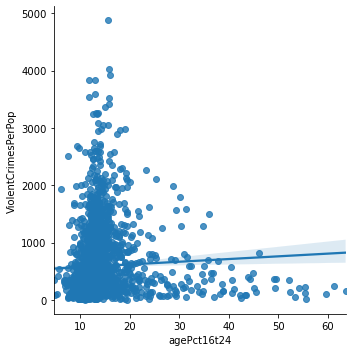

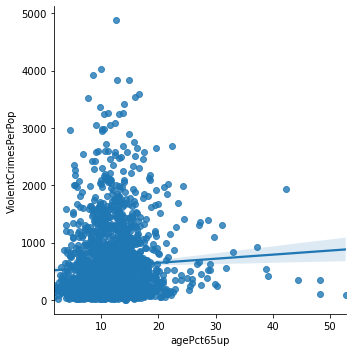

In [17]:
sns.lmplot(x='agePct12t21', y='ViolentCrimesPerPop', data=crime)
sns.lmplot(x='agePct12t29', y='ViolentCrimesPerPop', data=crime)
sns.lmplot(x='agePct16t24', y='ViolentCrimesPerPop', data=crime)
sns.lmplot(x='agePct65up', y='ViolentCrimesPerPop', data=crime)

In [18]:
# calculate correlation coeffcient between %age and violent crimes
print('Correlation coefficient for ages 12-21: ', scipy.stats.pearsonr(crime1['agePct12t21'], crime1['ViolentCrimesPerPop'])[0])
print('Correlation coefficient for ages 12-29: ', scipy.stats.pearsonr(crime1['agePct12t29'], crime1['ViolentCrimesPerPop'])[0])
print('Correlation coefficient for ages 16-24: ', scipy.stats.pearsonr(crime1['agePct16t24'], crime1['ViolentCrimesPerPop'])[0])
print('Correlation coefficient for ages 65+: ', scipy.stats.pearsonr(crime1['agePct65up'], crime1['ViolentCrimesPerPop'])[0])

Correlation coefficient for ages 12-21:  0.02202395356565119
Correlation coefficient for ages 12-29:  0.1099396079134631
Correlation coefficient for ages 16-24:  0.04841759061410261
Correlation coefficient for ages 65+:  0.05396574839211378


Plot linear regression plots for population age and violent crimes

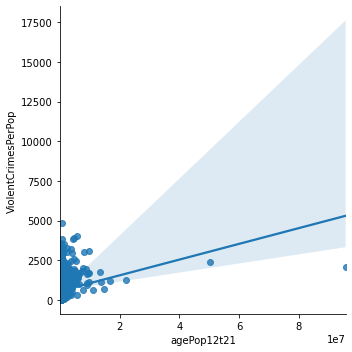

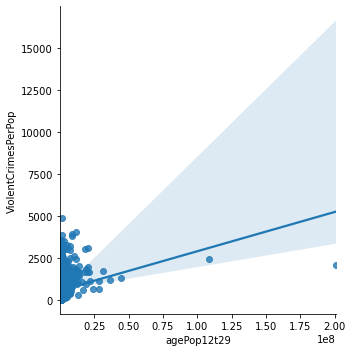

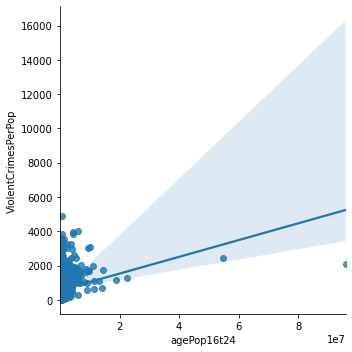

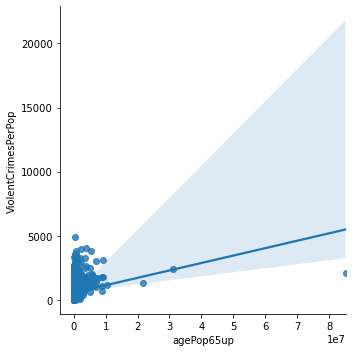

In [19]:
sns.lmplot(x='agePop12t21', y='ViolentCrimesPerPop', data=crime)
sns.lmplot(x='agePop12t29', y='ViolentCrimesPerPop', data=crime)
sns.lmplot(x='agePop16t24', y='ViolentCrimesPerPop', data=crime)
sns.lmplot(x='agePop65up', y='ViolentCrimesPerPop', data=crime)

In [20]:
# calculate correlation coeffcient between %age and violent crimes
print('Correlation coefficient for ages 12-21: ', scipy.stats.pearsonr(crime1['agePop12t21'], crime1['ViolentCrimesPerPop'])[0])
print('Correlation coefficient for ages 12-29: ', scipy.stats.pearsonr(crime1['agePop12t29'], crime1['ViolentCrimesPerPop'])[0])
print('Correlation coefficient for ages 16-24: ', scipy.stats.pearsonr(crime1['agePop16t24'], crime1['ViolentCrimesPerPop'])[0])
print('Correlation coefficient for ages 65+: ', scipy.stats.pearsonr(crime1['agePop65up'], crime1['ViolentCrimesPerPop'])[0])

Correlation coefficient for ages 12-21:  0.22012359052809355
Correlation coefficient for ages 12-29:  0.2188657592482586
Correlation coefficient for ages 16-24:  0.22264431466013046
Correlation coefficient for ages 65+:  0.2117114786134144


Plot linear regression plots for %education and non-violent crimes

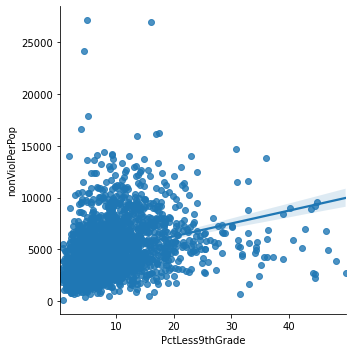

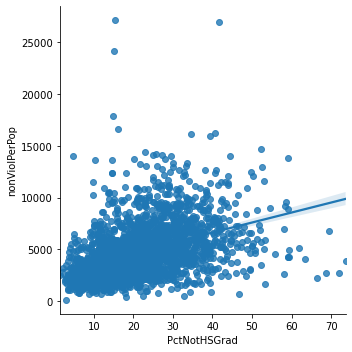

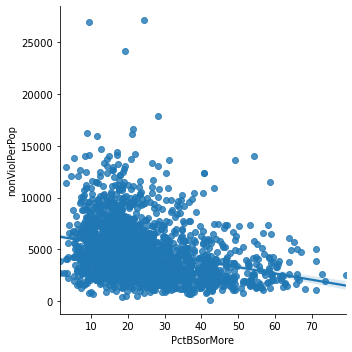

In [21]:
sns.lmplot(x='PctLess9thGrade', y='nonViolPerPop', data=crime)
sns.lmplot(x='PctNotHSGrad', y='nonViolPerPop', data=crime)
sns.lmplot(x='PctBSorMore', y='nonViolPerPop', data=crime)

In [24]:
# calculate correlation coeffcient between %education and non-violent crimes
crime1 = crime.dropna(subset=['agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 
                              'agePop12t21', 'agePop12t29', 'agePop16t24', 'agePop65up',
                              'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
                              'PopLess9thGrade', 'PopNotHSGrad', 'PopBSorMore',
                              'nonViolPerPop', 'ViolentCrimesPerPop'], how='any')
print('Correlation coefficient for PctLess9thGrade: ', scipy.stats.pearsonr(crime1['PctLess9thGrade'], crime1['nonViolPerPop'])[0])
print('Correlation coefficient for PctNotHSGrad: ', scipy.stats.pearsonr(crime1['PctNotHSGrad'], crime1['nonViolPerPop'])[0])
print('Correlation coefficient for PctBSorMore: ', scipy.stats.pearsonr(crime1['PctBSorMore'], crime1['nonViolPerPop'])[0])

Correlation coefficient for PctLess9thGrade:  0.28784927687473016
Correlation coefficient for PctNotHSGrad:  0.3665001575364964
Correlation coefficient for PctBSorMore:  -0.27101682578840336


Plot linear regression plots for  population education and non-violent crimes

In [25]:
crime['PopLess9thGrade'] = crime['PctLess9thGrade'] * crime['population']
crime['PopNotHSGrad'] = crime['PctNotHSGrad'] * crime['population']
crime['PopBSorMore'] = crime['PctBSorMore'] * crime['population']

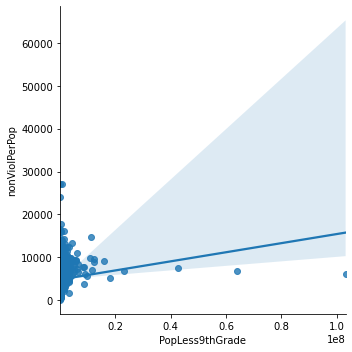

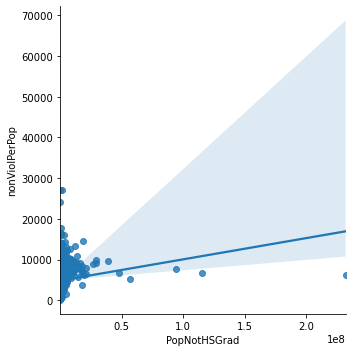

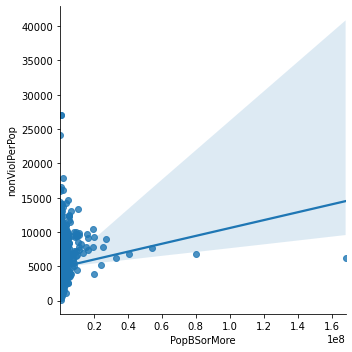

In [26]:
sns.lmplot(x='PopLess9thGrade', y='nonViolPerPop', data=crime)
sns.lmplot(x='PopNotHSGrad', y='nonViolPerPop', data=crime)
sns.lmplot(x='PopBSorMore', y='nonViolPerPop', data=crime)

In [27]:
# calculate correlation coeffcient between population education and non-violent crimes
print('Correlation coefficient for PopLess9thGrade: ', scipy.stats.pearsonr(crime1['PopLess9thGrade'], crime1['nonViolPerPop'])[0])
print('Correlation coefficient for PopNotHSGrad: ', scipy.stats.pearsonr(crime1['PopNotHSGrad'], crime1['nonViolPerPop'])[0])
print('Correlation coefficient for PopBSorMore: ', scipy.stats.pearsonr(crime1['PopBSorMore'], crime1['nonViolPerPop'])[0])

Correlation coefficient for PopLess9thGrade:  0.11147481298678563
Correlation coefficient for PopNotHSGrad:  0.11912455062613182
Correlation coefficient for PopBSorMore:  0.09851144679694106


Plot linear regression plots for %education and non-violent crimes

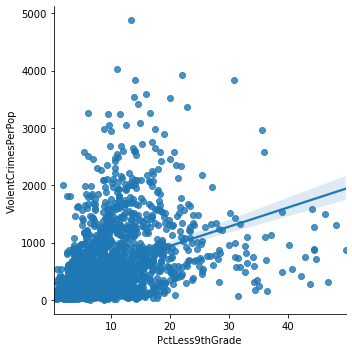

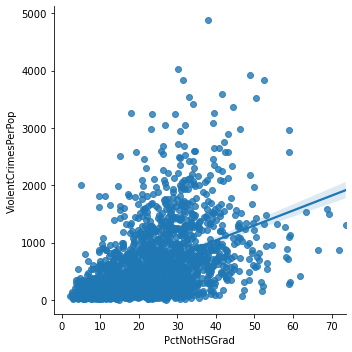

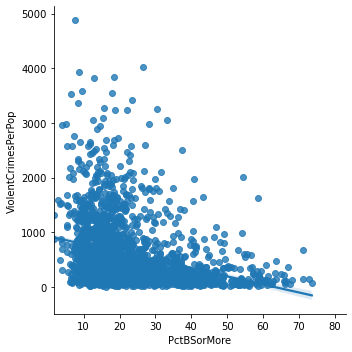

In [28]:
sns.lmplot(x='PctLess9thGrade', y='ViolentCrimesPerPop', data=crime)
sns.lmplot(x='PctNotHSGrad', y='ViolentCrimesPerPop', data=crime)
sns.lmplot(x='PctBSorMore', y='ViolentCrimesPerPop', data=crime)

In [29]:
# calculate correlation coeffcient between %education and violent crimes
print('Correlation coefficient for PctLess9thGrade: ', scipy.stats.pearsonr(crime1['PctLess9thGrade'], crime1['ViolentCrimesPerPop'])[0])
print('Correlation coefficient for PctNotHSGrad: ', scipy.stats.pearsonr(crime1['PctNotHSGrad'], crime1['ViolentCrimesPerPop'])[0])
print('Correlation coefficient for PctBSorMore: ', scipy.stats.pearsonr(crime1['PctBSorMore'], crime1['ViolentCrimesPerPop'])[0])

Correlation coefficient for PctLess9thGrade:  0.37080716309505024
Correlation coefficient for PctNotHSGrad:  0.46651461611308775
Correlation coefficient for PctBSorMore:  -0.29929005457851565


Plot linear regression plots for population education and violent crimes

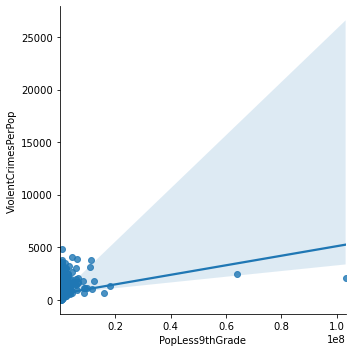

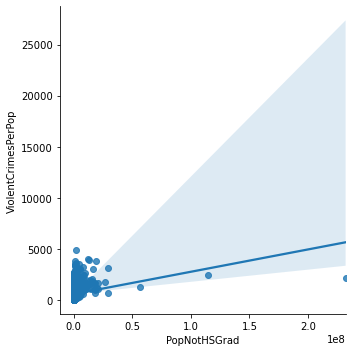

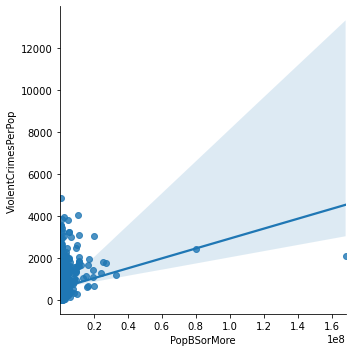

In [30]:
sns.lmplot(x='PopLess9thGrade', y='ViolentCrimesPerPop', data=crime)
sns.lmplot(x='PopNotHSGrad', y='ViolentCrimesPerPop', data=crime)
sns.lmplot(x='PopBSorMore', y='ViolentCrimesPerPop', data=crime)

In [31]:
# calculate correlation coeffcient between population education and violent crimes
print('Correlation coefficient for PopLess9thGrade: ', scipy.stats.pearsonr(crime1['PopLess9thGrade'], crime1['ViolentCrimesPerPop'])[0])
print('Correlation coefficient for PopNotHSGrad: ', scipy.stats.pearsonr(crime1['PopNotHSGrad'], crime1['ViolentCrimesPerPop'])[0])
print('Correlation coefficient for PopBSorMore: ', scipy.stats.pearsonr(crime1['PopBSorMore'], crime1['ViolentCrimesPerPop'])[0])

Correlation coefficient for PopLess9thGrade:  0.21514133095190566
Correlation coefficient for PopNotHSGrad:  0.22474245308421073
Correlation coefficient for PopBSorMore:  0.1788314876881413


Plot linear regression plots for %employment/unemployment and non-violent crimes

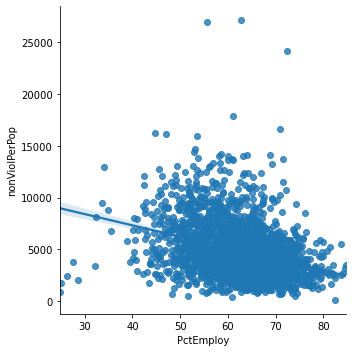

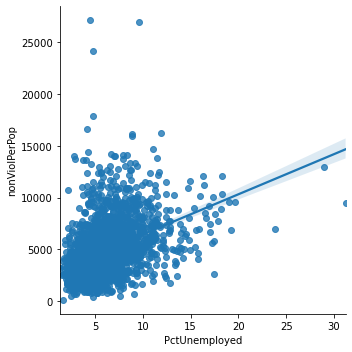

In [32]:
sns.lmplot(x='PctEmploy', y='nonViolPerPop', data=crime)
sns.lmplot(x='PctUnemployed', y='nonViolPerPop', data=crime)

In [36]:
# calculate correlation coefficient between %employed/unemployed and non-violent crimes
crime1 = crime.dropna(subset=['agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 
                              'agePop12t21', 'agePop12t29', 'agePop16t24', 'agePop65up',
                              'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
                              'PopLess9thGrade', 'PopNotHSGrad', 'PopBSorMore',
                              'PctUnemployed', 'PctEmploy',
                              'PopUnemployed', 'PopEmploy',
                              'nonViolPerPop', 'ViolentCrimesPerPop'], how='any')
print('Correlation coefficient for PctUnemployed: ', scipy.stats.pearsonr(crime1['PctUnemployed'], crime1['nonViolPerPop'])[0])
print('Correlation coefficient for PctEmploy: ', scipy.stats.pearsonr(crime1['PctEmploy'], crime1['nonViolPerPop'])[0])

Correlation coefficient for PctUnemployed:  0.39208500191553797
Correlation coefficient for PctEmploy:  -0.3047104919359426


Plot linear regression plots for population employment/unemploymet and non-violent crimes

In [37]:
crime['PopEmploy'] = crime['PctEmploy'] * crime['population']
crime['PopUnemployed'] = crime['PctUnemployed'] * crime['population']

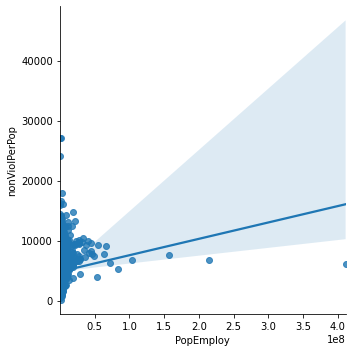

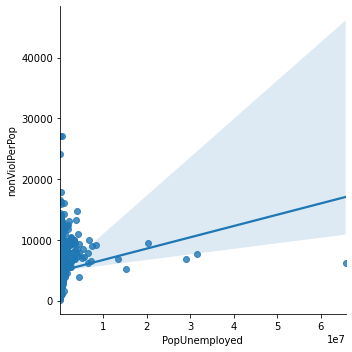

In [38]:
sns.lmplot(x='PopEmploy', y='nonViolPerPop', data=crime)
sns.lmplot(x='PopUnemployed', y='nonViolPerPop', data=crime)

In [40]:
# Calculate correlation coefficient for population employed/unemployed and non-violent crimes
print('Correlation coefficient for PopUnemployed: ', scipy.stats.pearsonr(crime1['PopUnemployed'], crime1['nonViolPerPop'])[0])
print('Correlation coefficient for PopEmploy: ', scipy.stats.pearsonr(crime1['PopEmploy'], crime1['nonViolPerPop'])[0])

Correlation coefficient for PopUnemployed:  0.1217417798243135
Correlation coefficient for PopEmploy:  0.11749062427354053


Plot linear regression plots for %employment/unemployment and violent crimes

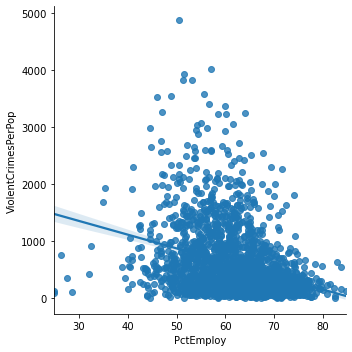

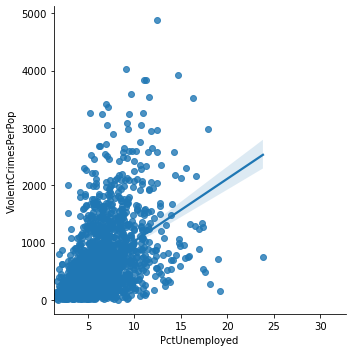

In [41]:
sns.lmplot(x='PctEmploy', y='ViolentCrimesPerPop', data=crime)
sns.lmplot(x='PctUnemployed', y='ViolentCrimesPerPop', data=crime)

In [42]:
# Calculate correlation coefficient for %employed/unemployed and violent crimes
print('Correlation coefficient for PctUnemployed: ', scipy.stats.pearsonr(crime1['PctUnemployed'], crime1['ViolentCrimesPerPop'])[0])
print('Correlation coefficient for PctEmploy: ', scipy.stats.pearsonr(crime1['PctEmploy'], crime1['ViolentCrimesPerPop'])[0])

Correlation coefficient for PctUnemployed:  0.4749680398078536
Correlation coefficient for PctEmploy:  -0.31226118672258446


Plot linear regression plots for population employment/unemploymet and violent crimes

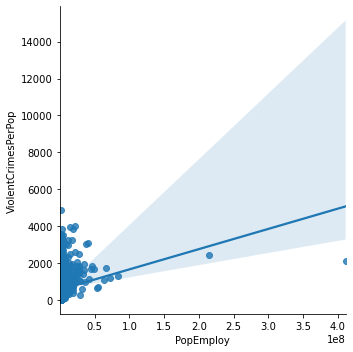

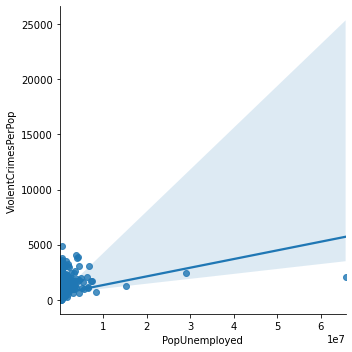

In [43]:
sns.lmplot(x='PopEmploy', y='ViolentCrimesPerPop', data=crime)
sns.lmplot(x='PopUnemployed', y='ViolentCrimesPerPop', data=crime)

In [44]:
# Calculate correlation coefficient for population employed/unemployed and violent crimes
print('Correlation coefficient for PopUnemployed: ', scipy.stats.pearsonr(crime1['PopUnemployed'], crime1['ViolentCrimesPerPop'])[0])
print('Correlation coefficient for PopEmploy: ', scipy.stats.pearsonr(crime1['PopEmploy'], crime1['ViolentCrimesPerPop'])[0])

Correlation coefficient for PopUnemployed:  0.22277532593518973
Correlation coefficient for PopEmploy:  0.20954788198015384


Plot linear regression plots for %vacancy and non-violent crimes

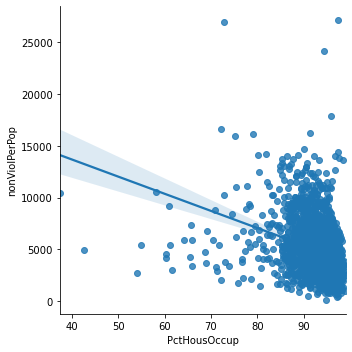

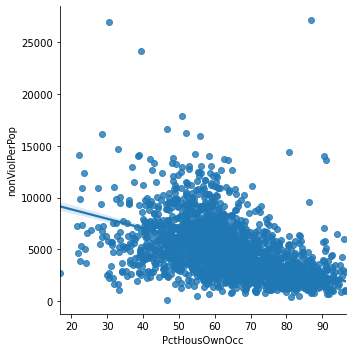

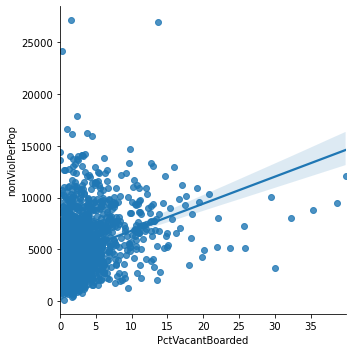

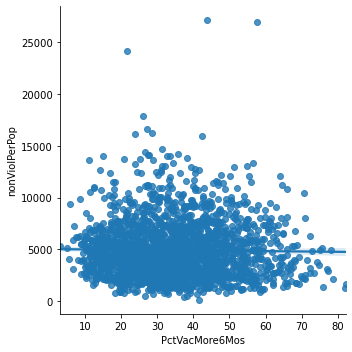

In [45]:
sns.lmplot(x='PctHousOccup', y='nonViolPerPop', data=crime)
sns.lmplot(x='PctHousOwnOcc', y='nonViolPerPop', data=crime)
sns.lmplot(x='PctVacantBoarded', y='nonViolPerPop', data=crime)
sns.lmplot(x='PctVacMore6Mos', y='nonViolPerPop', data=crime)

In [48]:
# calculate correlation coefficient between %vacancy and non-violent crimes
crime1 = crime.dropna(subset=['agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 
                              'agePop12t21', 'agePop12t29', 'agePop16t24', 'agePop65up',
                              'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
                              'PopLess9thGrade', 'PopNotHSGrad', 'PopBSorMore',
                              'PctUnemployed', 'PctEmploy',
                              'PopUnemployed', 'PopEmploy',
                              'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos',
                              'PopHousOccup', 'PopHousOwnOcc', 'PopVacantBoarded', 'PopVacMore6Mos',
                              'nonViolPerPop', 'ViolentCrimesPerPop'], how='any')
print('Correlation coefficient for PctHousOccup: ', scipy.stats.pearsonr(crime1['PctHousOccup'], crime1['nonViolPerPop'])[0])
print('Correlation coefficient for PctHousOwnOcc: ', scipy.stats.pearsonr(crime1['PctHousOwnOcc'], crime1['nonViolPerPop'])[0])
print('Correlation coefficient for PctVacantBoarded: ', scipy.stats.pearsonr(crime1['PctVacantBoarded'], crime1['nonViolPerPop'])[0])
print('Correlation coefficient for PctVacMore6Mos: ', scipy.stats.pearsonr(crime1['PctVacMore6Mos'], crime1['nonViolPerPop'])[0])

Correlation coefficient for PctHousOccup:  -0.3039032395515145
Correlation coefficient for PctHousOwnOcc:  -0.4622358628933084
Correlation coefficient for PctVacantBoarded:  0.32367867144782136
Correlation coefficient for PctVacMore6Mos:  -0.04302596621892053


Plot linear regression plots for population vacancy and non-violent crimes

In [49]:
crime['PopHousOccup'] = crime['PctHousOccup'] * crime['population']
crime['PopHousOwnOcc'] = crime['PctHousOwnOcc'] * crime['population']
crime['PopVacantBoarded'] = crime['PctVacantBoarded'] * crime['population']
crime['PopVacMore6Mos'] = crime['PctVacMore6Mos'] * crime['population']

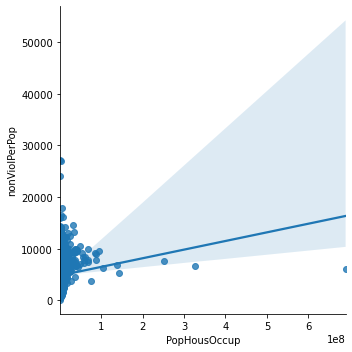

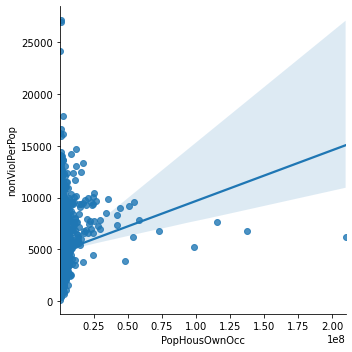

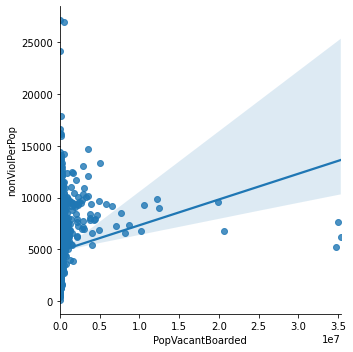

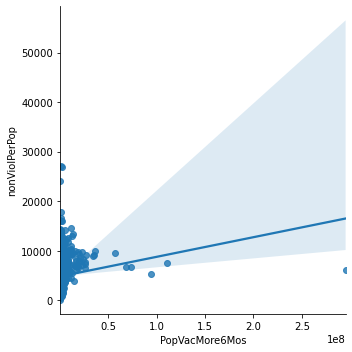

In [50]:
sns.lmplot(x='PopHousOccup', y='nonViolPerPop', data=crime)
sns.lmplot(x='PopHousOwnOcc', y='nonViolPerPop', data=crime)
sns.lmplot(x='PopVacantBoarded', y='nonViolPerPop', data=crime)
sns.lmplot(x='PopVacMore6Mos', y='nonViolPerPop', data=crime)

In [51]:
# calculate correlation coefficient for population vacancy and non-violent crimes
print('Correlation coefficient for PopHousOccup: ', scipy.stats.pearsonr(crime1['PopHousOccup'], crime1['nonViolPerPop'])[0])
print('Correlation coefficient for PopHousOwnOcc: ', scipy.stats.pearsonr(crime1['PopHousOwnOcc'], crime1['nonViolPerPop'])[0])
print('Correlation coefficient for PopVacantBoarded: ', scipy.stats.pearsonr(crime1['PopVacantBoarded'], crime1['nonViolPerPop'])[0])
print('Correlation coefficient for PopVacMore6Mos: ', scipy.stats.pearsonr(crime1['PopVacMore6Mos'], crime1['nonViolPerPop'])[0])

Correlation coefficient for PopHousOccup:  0.1133129368532727
Correlation coefficient for PopHousOwnOcc:  0.13714579037718935
Correlation coefficient for PopVacantBoarded:  0.1531535526401337
Correlation coefficient for PopVacMore6Mos:  0.10825444676130508


Plot linear regression plots for %vacancy and non-violent crimes

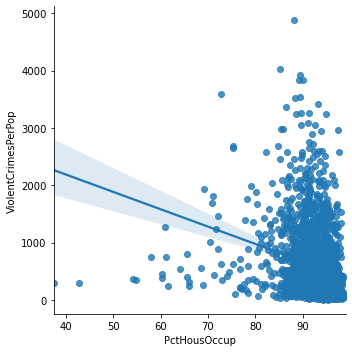

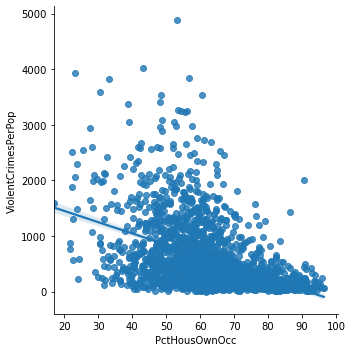

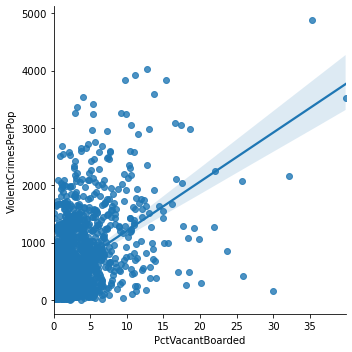

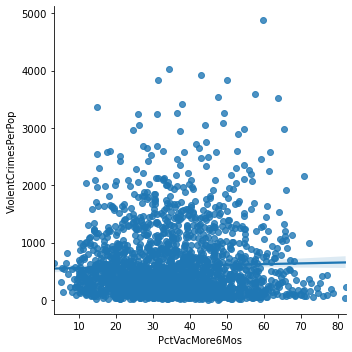

In [52]:
sns.lmplot(x='PctHousOccup', y='ViolentCrimesPerPop', data=crime)
sns.lmplot(x='PctHousOwnOcc', y='ViolentCrimesPerPop', data=crime)
sns.lmplot(x='PctVacantBoarded', y='ViolentCrimesPerPop', data=crime)
sns.lmplot(x='PctVacMore6Mos', y='ViolentCrimesPerPop', data=crime)

In [53]:
# calculate correlation coefficient between %vacancy and violent crimes
print('Correlation coefficient for PctHousOccup: ', scipy.stats.pearsonr(crime1['PctHousOccup'], crime1['ViolentCrimesPerPop'])[0])
print('Correlation coefficient for PctHousOwnOcc: ', scipy.stats.pearsonr(crime1['PctHousOwnOcc'], crime1['ViolentCrimesPerPop'])[0])
print('Correlation coefficient for PctVacantBoarded: ', scipy.stats.pearsonr(crime1['PctVacantBoarded'], crime1['ViolentCrimesPerPop'])[0])
print('Correlation coefficient for PctVacMore6Mos: ', scipy.stats.pearsonr(crime1['PctVacMore6Mos'], crime1['ViolentCrimesPerPop'])[0])

Correlation coefficient for PctHousOccup:  -0.25554595819128345
Correlation coefficient for PctHousOwnOcc:  -0.46069357769159813
Correlation coefficient for PctVacantBoarded:  0.47510410552705856
Correlation coefficient for PctVacMore6Mos:  0.017526764073398652


Plot linear regression plots for population vacancy and non-violent crimes

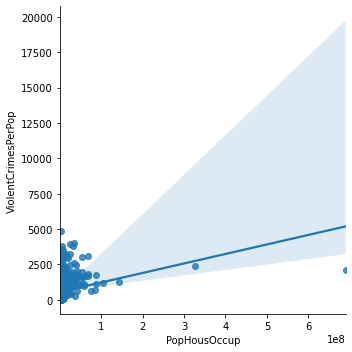

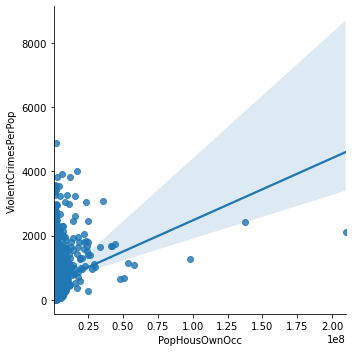

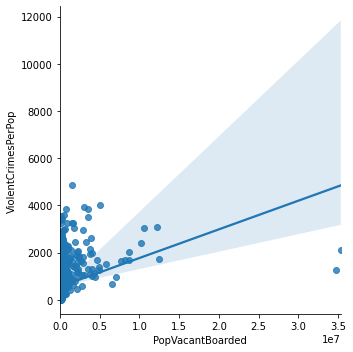

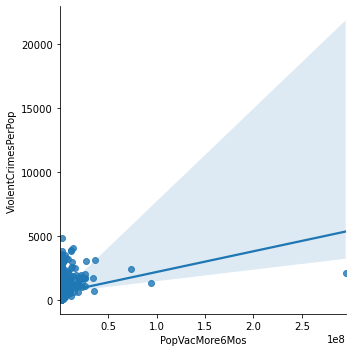

In [54]:
sns.lmplot(x='PopHousOccup', y='ViolentCrimesPerPop', data=crime)
sns.lmplot(x='PopHousOwnOcc', y='ViolentCrimesPerPop', data=crime)
sns.lmplot(x='PopVacantBoarded', y='ViolentCrimesPerPop', data=crime)
sns.lmplot(x='PopVacMore6Mos', y='ViolentCrimesPerPop', data=crime)

In [55]:
# calculate correlatiion coefficient between population vacancy and violent crimes
print('Correlation coefficient for PopHousOccup: ', scipy.stats.pearsonr(crime1['PopHousOccup'], crime1['ViolentCrimesPerPop'])[0])
print('Correlation coefficient for PopHousOwnOcc: ', scipy.stats.pearsonr(crime1['PopHousOwnOcc'], crime1['ViolentCrimesPerPop'])[0])
print('Correlation coefficient for PopVacantBoarded: ', scipy.stats.pearsonr(crime1['PopVacantBoarded'], crime1['ViolentCrimesPerPop'])[0])
print('Correlation coefficient for PopVacMore6Mos: ', scipy.stats.pearsonr(crime1['PopVacMore6Mos'], crime1['ViolentCrimesPerPop'])[0])

Correlation coefficient for PopHousOccup:  0.2062343596261637
Correlation coefficient for PopHousOwnOcc:  0.2318456195991899
Correlation coefficient for PopVacantBoarded:  0.2698337506115343
Correlation coefficient for PopVacMore6Mos:  0.1995592330118498


Plot linear regression plot for % race and non-violent crimes

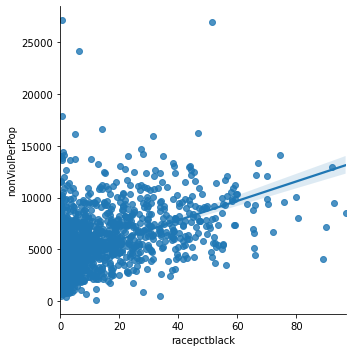

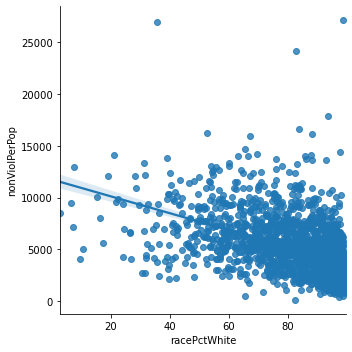

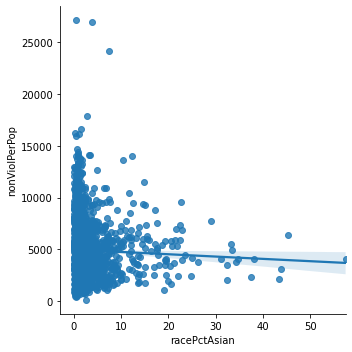

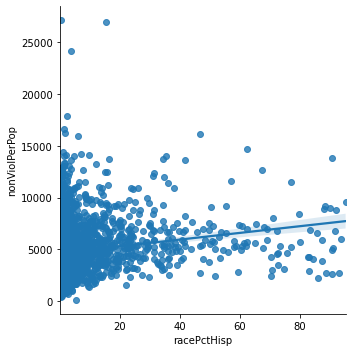

In [56]:
sns.lmplot(x='racepctblack', y='nonViolPerPop', data=crime)
sns.lmplot(x='racePctWhite', y='nonViolPerPop', data=crime)
sns.lmplot(x='racePctAsian', y='nonViolPerPop', data=crime)
sns.lmplot(x='racePctHisp', y='nonViolPerPop', data=crime)

In [72]:
# calculate correlation coefficient between %race and non-violent crimes
crime1 = crime.dropna(subset=['agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 
                              'agePop12t21', 'agePop12t29', 'agePop16t24', 'agePop65up',
                              'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
                              'PopLess9thGrade', 'PopNotHSGrad', 'PopBSorMore',
                              'PctUnemployed', 'PctEmploy',
                              'PopUnemployed', 'PopEmploy',
                              'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos',
                              'PopHousOccup', 'PopHousOwnOcc', 'PopVacantBoarded', 'PopVacMore6Mos',
                              'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp',
                              'racepopblack', 'racePopWhite', 'racePopAsian', 'racePopHisp',
                              'nonViolPerPop', 'ViolentCrimesPerPop'], how='any')
print('Correlation coefficient for pctraceblack: ', scipy.stats.pearsonr(crime1['racepctblack'], crime1['nonViolPerPop'])[0])
print('Correlation coefficient for pctRaceWhite: ', scipy.stats.pearsonr(crime1['racePctWhite'], crime1['nonViolPerPop'])[0])
print('Correlation coefficient for pctRaceAsian: ', scipy.stats.pearsonr(crime1['racePctAsian'], crime1['nonViolPerPop'])[0])
print('Correlation coefficient for pctRaceHisp: ', scipy.stats.pearsonr(crime1['racePctHisp'], crime1['nonViolPerPop'])[0])

Correlation coefficient for pctraceblack:  0.4743247060336021
Correlation coefficient for pctRaceWhite:  -0.4765791610681369
Correlation coefficient for pctRaceAsian:  -0.03474179713723831
Correlation coefficient for pctRaceHisp:  0.17462237036514378


Plot linear regression plots for population race and non-violent crimes

In [73]:
crime['racepopblack'] = crime['racepctblack'] * crime['population']
crime['racePopWhite'] = crime['racePctWhite'] * crime['population']
crime['racePopAsian'] = crime['racePctAsian'] * crime['population']
crime['racePopHisp'] = crime['racePctHisp'] * crime['population']

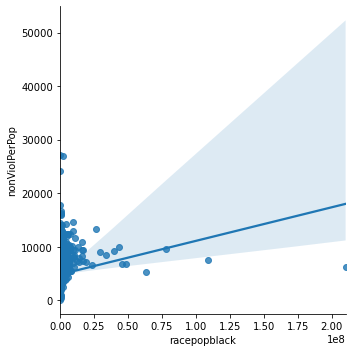

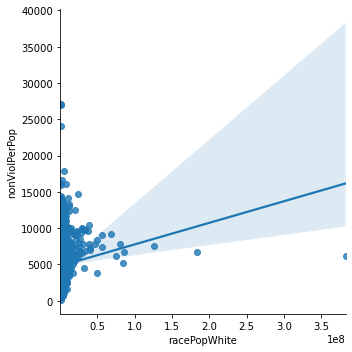

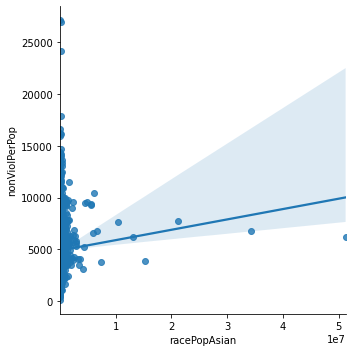

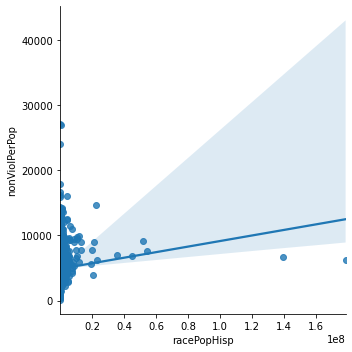

In [74]:
sns.lmplot(x='racepopblack', y='nonViolPerPop', data=crime)
sns.lmplot(x='racePopWhite', y='nonViolPerPop', data=crime)
sns.lmplot(x='racePopAsian', y='nonViolPerPop', data=crime)
sns.lmplot(x='racePopHisp', y='nonViolPerPop', data=crime)

In [75]:
# calculate correlation coefficient for population race and non-violent crimes
print('Correlation coefficient for popraceblack: ', scipy.stats.pearsonr(crime1['racepopblack'], crime1['nonViolPerPop'])[0])
print('Correlation coefficient for popRaceWhite: ', scipy.stats.pearsonr(crime1['racePopWhite'], crime1['nonViolPerPop'])[0])
print('Correlation coefficient for popRaceAsian: ', scipy.stats.pearsonr(crime1['racePopAsian'], crime1['nonViolPerPop'])[0])
print('Correlation coefficient for popRaceHisp: ', scipy.stats.pearsonr(crime1['racePopHisp'], crime1['nonViolPerPop'])[0])

Correlation coefficient for popraceblack:  0.1381219744795777
Correlation coefficient for popRaceWhite:  0.12002428600448703
Correlation coefficient for popRaceAsian:  0.054190814071591376
Correlation coefficient for popRaceHisp:  0.08281266109978011


Plot linear regression plot for %race and violent crimes

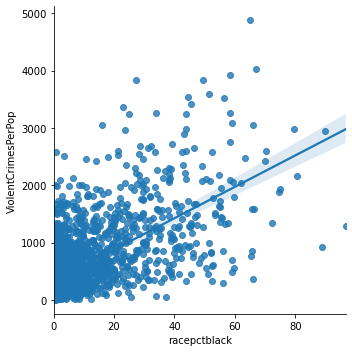

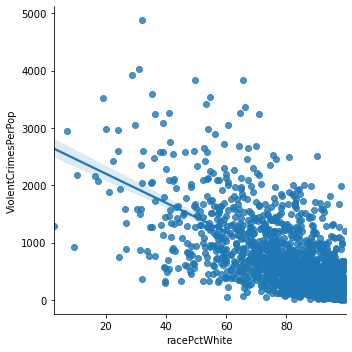

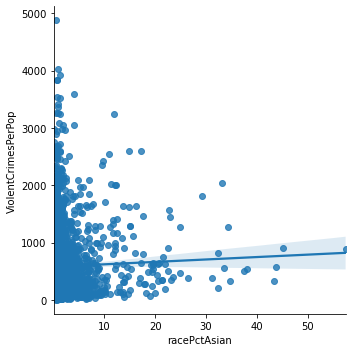

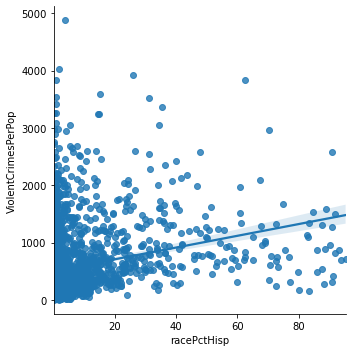

In [76]:
sns.lmplot(x='racepctblack', y='ViolentCrimesPerPop', data=crime)
sns.lmplot(x='racePctWhite', y='ViolentCrimesPerPop', data=crime)
sns.lmplot(x='racePctAsian', y='ViolentCrimesPerPop', data=crime)
sns.lmplot(x='racePctHisp', y='ViolentCrimesPerPop', data=crime)

In [77]:
# calculate correlation coefficient for %race and violent crimes
print('Correlation coefficient for pctraceblack: ', scipy.stats.pearsonr(crime1['racepctblack'], crime1['ViolentCrimesPerPop'])[0])
print('Correlation coefficient for pctRaceWhite: ', scipy.stats.pearsonr(crime1['racePctWhite'], crime1['ViolentCrimesPerPop'])[0])
print('Correlation coefficient for pctRaceAsian: ', scipy.stats.pearsonr(crime1['racePctAsian'], crime1['ViolentCrimesPerPop'])[0])
print('Correlation coefficient for pctRaceHisp: ', scipy.stats.pearsonr(crime1['racePctHisp'], crime1['ViolentCrimesPerPop'])[0])

Correlation coefficient for pctraceblack:  0.6238334896507505
Correlation coefficient for pctRaceWhite:  -0.676357463352348
Correlation coefficient for pctRaceAsian:  0.03604447688047006
Correlation coefficient for pctRaceHisp:  0.26451715732322045


Plot linear regression plot for population race and violent crimes

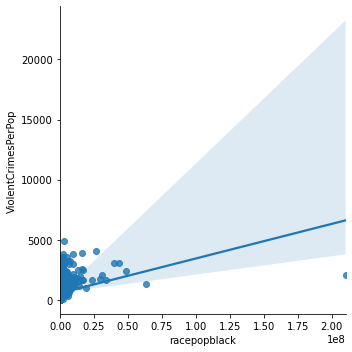

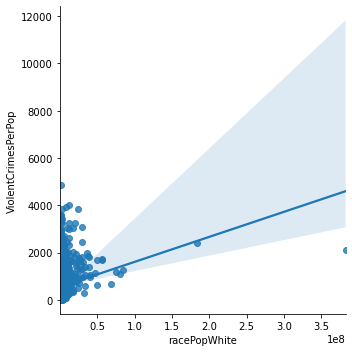

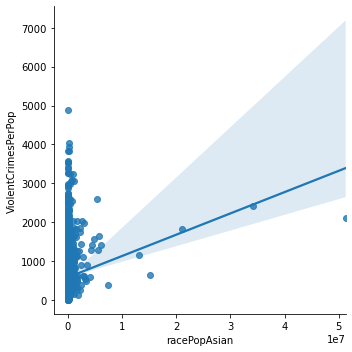

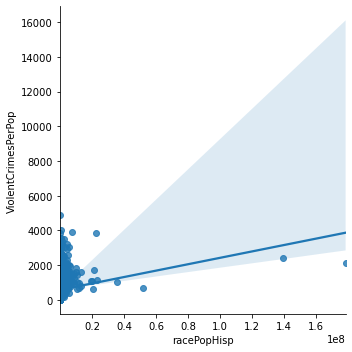

In [78]:
sns.lmplot(x='racepopblack', y='ViolentCrimesPerPop', data=crime)
sns.lmplot(x='racePopWhite', y='ViolentCrimesPerPop', data=crime)
sns.lmplot(x='racePopAsian', y='ViolentCrimesPerPop', data=crime)
sns.lmplot(x='racePopHisp', y='ViolentCrimesPerPop', data=crime)

In [79]:
# calculate correlation coefficient for population race and violent crimes
print('Correlation coefficient for popraceblack: ', scipy.stats.pearsonr(crime1['racepopblack'], crime1['ViolentCrimesPerPop'])[0])
print('Correlation coefficient for popRaceWhite: ', scipy.stats.pearsonr(crime1['racePopWhite'], crime1['ViolentCrimesPerPop'])[0])
print('Correlation coefficient for popRaceAsian: ', scipy.stats.pearsonr(crime1['racePopAsian'], crime1['ViolentCrimesPerPop'])[0])
print('Correlation coefficient for popRaceHisp: ', scipy.stats.pearsonr(crime1['racePopHisp'], crime1['ViolentCrimesPerPop'])[0])

Correlation coefficient for popraceblack:  0.2614411462973624
Correlation coefficient for popRaceWhite:  0.1910352609128278
Correlation coefficient for popRaceAsian:  0.14443796853542853
Correlation coefficient for popRaceHisp:  0.16900747491190227


Plot linear regression plots for violent crimes vs. non-violent crimes by region

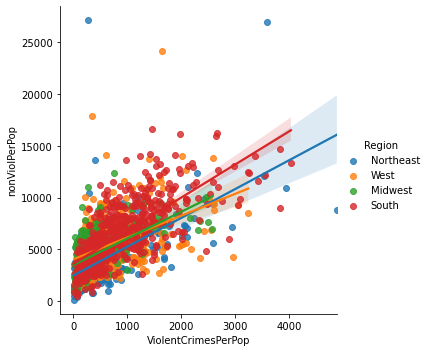

In [80]:
sns.lmplot(x='ViolentCrimesPerPop', y='nonViolPerPop', data=crime,
           fit_reg=True, #  regression line
           hue='Region',x_jitter=.1, y_jitter=0.1)   # Color by Region

# Correlation matrix and Multiple Linear Regression model 

### Plot heatmap

In [81]:
crime.corr()

Unnamed: 0  countyCode  communityCode      fold  population  \
Unnamed: 0        1.000000    0.330027       0.098597  0.026590    0.002961   
countyCode        0.330027    1.000000       0.124997 -0.060262    0.080867   
communityCode     0.098597    0.124997       1.000000  0.004526   -0.034680   
fold              0.026590   -0.060262       0.004526  1.000000   -0.044338   
population        0.002961    0.080867      -0.034680 -0.044338    1.000000   
...                    ...         ...            ...       ...         ...   
PopVacMore6Mos   -0.003181    0.062575      -0.037967 -0.048266    0.969573   
racepopblack      0.019008    0.091435      -0.050314 -0.047387    0.920310   
racePopWhite      0.006031    0.079932      -0.018727 -0.039264    0.985310   
racePopAsian     -0.033660    0.028103      -0.005206 -0.042699    0.881461   
racePopHisp      -0.031724   -0.013803      -0.026689 -0.036323    0.915035   

                householdsize  racepctblack  racePctWhite  racePctAsian  \
Unnamed: 0          -0.085890      0.168589     -0.093145     -0.118527   
countyCode          -0.032992      0.219294     -0.173580     -0.085545   
communityCode        0.002698     -0.013897      0.014749      0.033570   
fold                 0.015973     -0.040064      0.022973      0.004439   
population          -0.018841      0.135641     -0.184685      0.088360   
...                       ...           ...           ...           ...   
PopVacMore6Mos      -0.028066      0.162980     -0.180756      0.037435   
racepopblack        -0.025811      0.261235     -0.252400      0.023510   
racePopWhite        -0.037977      0.086765     -0.137822      0.087790   
racePopAsian         0.022648      0.043137     -0.162957      0.277567   
racePopHisp          0.062769      0.049429     -0.157381      0.095645   

                racePctHisp  ...  PopEmploy  PopUnemployed  PopHousOccup  \
Unnamed: 0        -0.098382  ...   0.003722       0.000673      0.001322   
countyCode        -0.088787  ...   0.087084       0.049108      0.082187   
communityCode      0.000687  ...  -0.030735      -0.049584     -0.034231   
fold               0.035620  ...  -0.043224      -0.045374     -0.044404   
population         0.094048  ...   0.997420       0.980257      0.999602   
...                     ...  ...        ...            ...           ...   
PopVacMore6Mos     0.062449  ...   0.954669       0.974549      0.967702   
racepopblack       0.036930  ...   0.899555       0.956437      0.917470   
racePopWhite       0.089963  ...   0.989585       0.941981      0.984765   
racePopAsian       0.108268  ...   0.888019       0.833330      0.888139   
racePopHisp        0.216809  ...   0.918027       0.890480      0.917507   

                PopHousOwnOcc  PopVacantBoarded  PopVacMore6Mos  racepopblack  \
Unnamed: 0           0.015846          0.007857       -0.003181      0.019008   
countyCode           0.093037          0.046351        0.062575      0.091435   
communityCode       -0.019389         -0.040014       -0.037967     -0.050314   
fold                -0.039704         -0.048556       -0.048266     -0.047387   
population           0.960874          0.817184        0.969573      0.920310   
...                       ...               ...             ...           ...   
PopVacMore6Mos       0.922105          0.878518        1.000000      0.961107   
racepopblack         0.873860          0.906417        0.961107      1.000000   
racePopWhite         0.963334          0.770024        0.941060      0.856934   
racePopAsian         0.809605          0.564153        0.794884      0.722720   
racePopHisp          0.849623          0.626975        0.836116      0.754417   

                racePopWhite  racePopAsian  racePopHisp  
Unnamed: 0          0.006031     -0.033660    -0.031724  
countyCode          0.079932      0.028103    -0.013803  
communityCode      -0.018727     -0.005206    -0.026689  
fold               -0.039264     -0.042699    -0

A lot of variables are present. Will tidy this up by subsetting columns into a new dataframe

In [82]:
# will leave out age group from this subset, since they did not have strong correlation
crimedata = crime[['PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
                  'PctUnemployed', 'PctEmploy',
                   'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos',
                   'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp',
                   'nonViolPerPop', 'ViolentCrimesPerPop']]

In [83]:
crimedata.corr()

PctLess9thGrade  PctNotHSGrad  PctBSorMore  \
PctLess9thGrade             1.000000      0.927560    -0.577203   
PctNotHSGrad                0.927560      1.000000    -0.751544   
PctBSorMore                -0.577203     -0.751544     1.000000   
PctUnemployed               0.657108      0.724004    -0.545808   
PctEmploy                  -0.531317     -0.617251     0.393518   
PctHousOccup               -0.144882     -0.207866     0.179709   
PctHousOwnOcc              -0.358801     -0.378211     0.190965   
PctVacantBoarded            0.322437      0.416527    -0.296578   
PctVacMore6Mos              0.209439      0.283349    -0.220493   
racepctblack                0.244873      0.367293    -0.188492   
racePctWhite               -0.458497     -0.494350     0.217388   
racePctAsian               -0.109690     -0.182692     0.262881   
racePctHisp                 0.635955      0.493895    -0.245779   
nonViolPerPop               0.303679      0.387613    -0.282542   
ViolentCrimesPerPop         0.371422      0.467596    -0.299898   

                     PctUnemployed  PctEmploy  PctHousOccup  PctHousOwnOcc  \
PctLess9thGrade           0.657108  -0.531317     -0.144882      -0.358801   
PctNotHSGrad              0.724004  -0.617251     -0.207866      -0.378211   
PctBSorMore              -0.545808   0.393518      0.179709       0.190965   
PctUnemployed             1.000000  -0.676430     -0.261544      -0.394427   
PctEmploy                -0.676430   1.000000      0.341939       0.236908   
PctHousOccup             -0.261544   0.341939      1.000000       0.171256   
PctHousOwnOcc            -0.394427   0.236908      0.171256       1.000000   
PctVacantBoarded          0.549636  -0.342344     -0.182542      -0.221876   
PctVacMore6Mos            0.299310  -0.372459     -0.274189       0.138628   
racepctblack              0.441598  -0.298779     -0.204498      -0.345849   
racePctWhite             -0.539588   0.282903      0.153423       0.449833   
racePctAsian             -0.133305   0.195498      0.177288      -0.078754   
racePctHisp               0.416788  -0.161893     -0.073658      -0.251056   
nonViolPerPop             0.408442  -0.329996     -0.309280      -0.466257   
ViolentCrimesPerPop       0.483441  -0.317644     -0.256836      -0.455359   

                     PctVacantBoarded  PctVacMore6Mos  racepctblack  \
PctLess9thGrade              0.322437        0.209439      0.244873   
PctNotHSGrad                 0.416527        0.283349      0.367293   
PctBSorMore                 -0.296578       -0.220493     -0.188492   
PctUnemployed                0.549636        0.299310      0.441598   
PctEmploy                   -0.342344       -0.372459     -0.298779   
PctHousOccup                -0.182542       -0.274189     -0.204498   
PctHousOwnOcc               -0.221876        0.138628     -0.345849   
PctVacantBoarded             1.000000        0.366664      0.521610   
PctVacMore6Mos               0.366664        1.000000      0.190708   
racepctblack                 0.521610        0.190708      1.000000   
racePctWhite                -0.487907       -0.033292     -0.820605   
racePctAsian                -0.113272       -0.323736     -0.089300   
racePctHisp                  0.151015       -0.122969     -0.063911   
nonViolPerPop                0.343413       -0.017010      0.484853   
ViolentCrimesPerPop          0.479910        0.030769      0.628368   

                     racePctWhite  racePctAsian  racePctHisp  nonViolPerPop  \
PctLess9thGrade         -0.458497     -0.109690     0.635955       0.303679   
PctNotHSGrad            -0.494350     -0.182692     0.493895       0.387613   
PctBSorMore              0.217388      0.262881    -0.245779      -0.282542   
PctUnemployed           -0.539588     -0.133305     0.416788       0.408442   
PctEmploy                0.282903      0.195498    -0.161893      -0.329996   
PctHousOccup             0.153423      0.177288    -0.073658      -0.309280   
PctHousOw

Looks much better

In [84]:
# load dataframe into a variable
crimedata_corr = crimedata.corr()

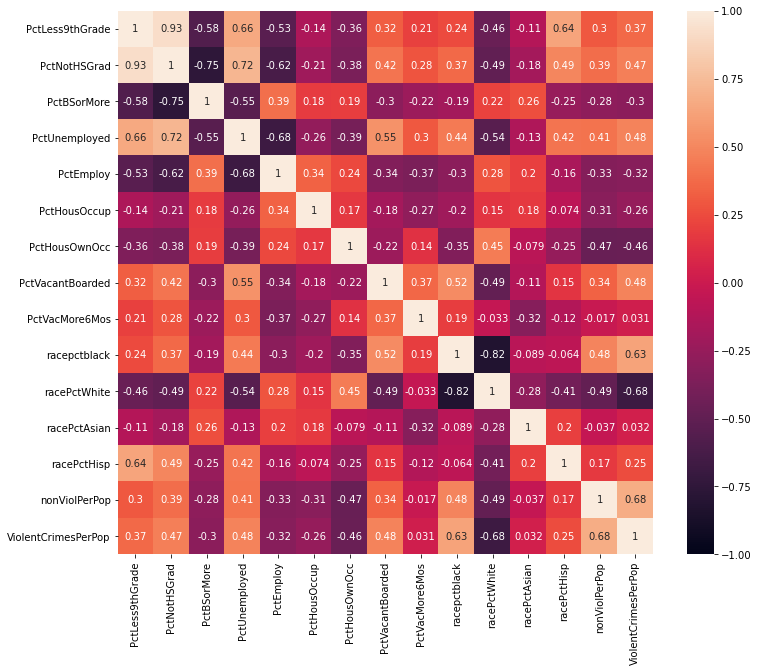

In [88]:
# make the correlation matrix plot
plt.figure(figsize=(12,10))
sns.heatmap(crimedata_corr,annot=True,vmin=-1.0)

This is so much concise and takes less time to generate. Correlation coefficients can be easily viewed for any pair of variables

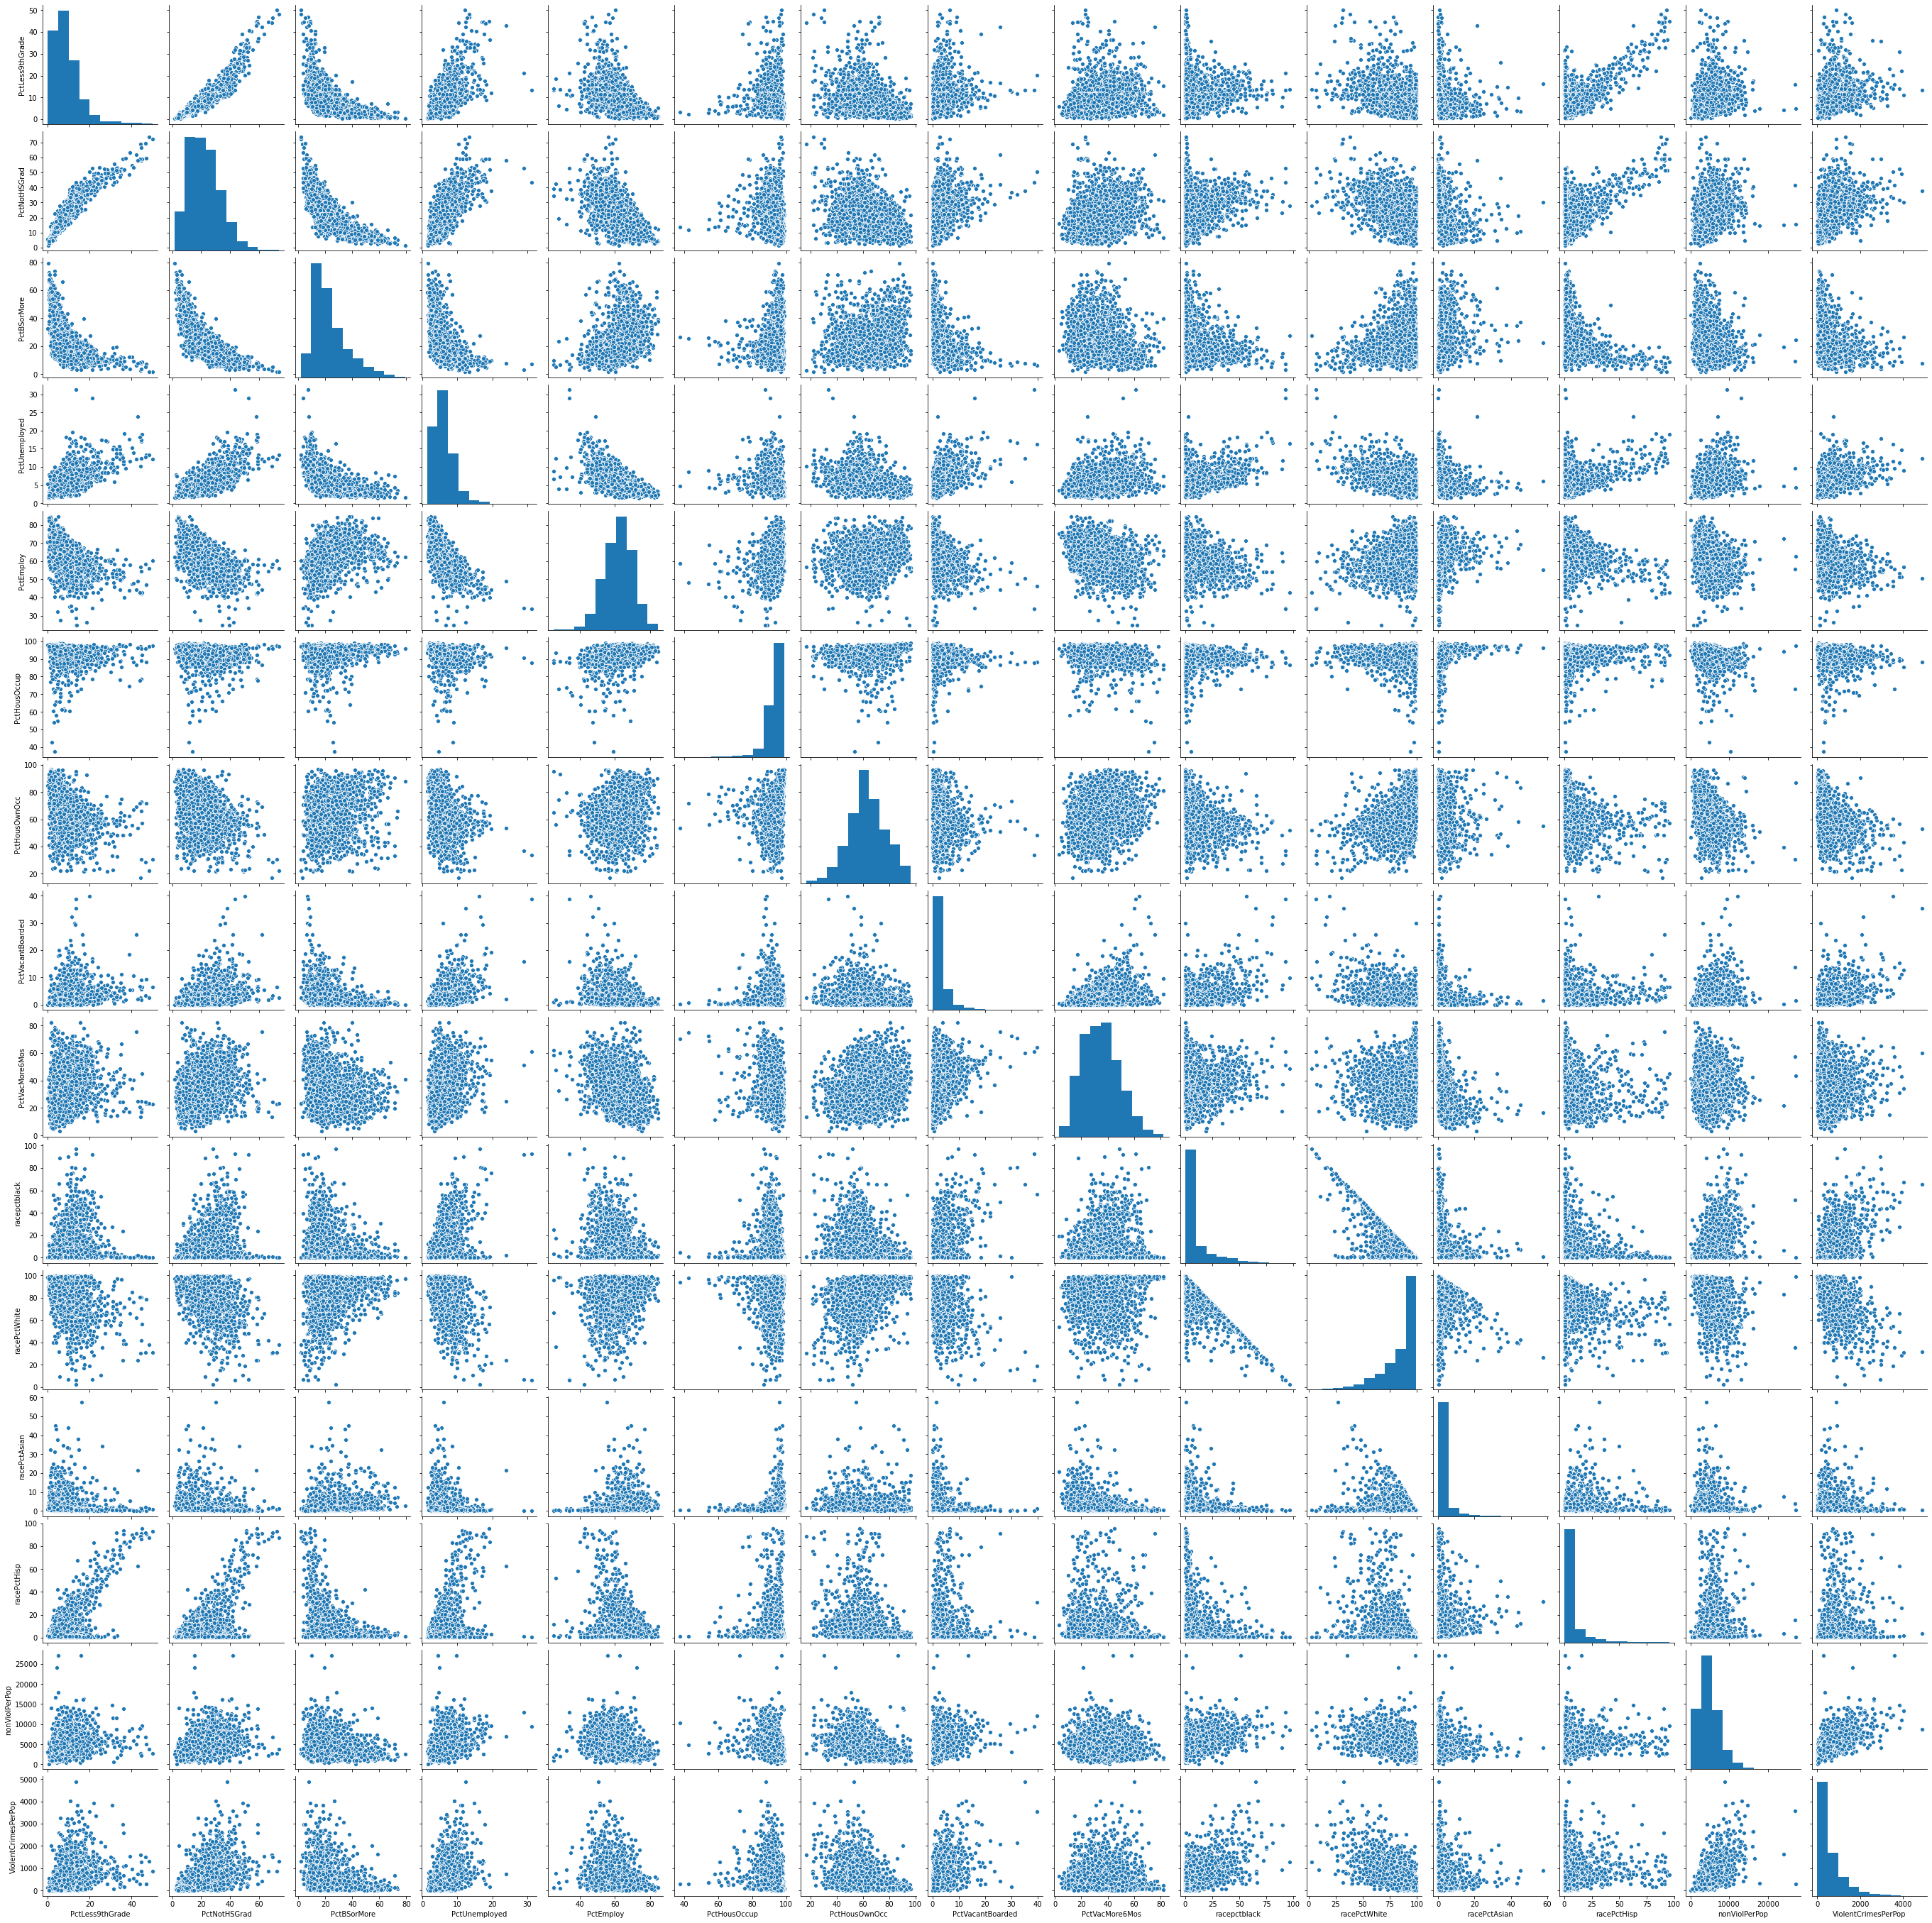

In [89]:
sns.pairplot(crimedata)

### Multiple Linear Regression

In [90]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing

# Subset data
X = crime1[['PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
                  'PctUnemployed', 'PctEmploy',
                   'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos',
                   'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp',
                   'nonViolPerPop', 'ViolentCrimesPerPop']]
y = crime1['ViolentCrimesPerPop']

# train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [91]:
# check size
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1426, 15) (1426,)
(476, 15) (476,)


In [92]:
# fit a model
lm = linear_model.LinearRegression(normalize=True)

# train model on test data
model = lm.fit(X_train, y_train)

# Evaluate model
print(model.score(X_train, y_train))

# Use model to make predictions
predictions = lm.predict(X_test)

# Calculate coeffcient and intercept
coefficients = model.coef_
intercepts = model.intercept_

1.0


In [93]:
# Use statsmodel
X = sm.add_constant(X)
model2 = sm.OLS(y_train,X_train).fit()
print (model2.summary())

                                 OLS Regression Results                                 
Dep. Variable:     ViolentCrimesPerPop   R-squared (uncentered):                   1.000
Model:                             OLS   Adj. R-squared (uncentered):              1.000
Method:                  Least Squares   F-statistic:                          1.235e+31
Date:                 Thu, 08 Oct 2020   Prob (F-statistic):                        0.00
Time:                         00:02:00   Log-Likelihood:                          36201.
No. Observations:                 1426   AIC:                                 -7.237e+04
Df Residuals:                     1411   BIC:                                 -7.229e+04
Df Model:                           15                                                  
Covariance Type:             nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [94]:
# show values
print("The coeffcient of our model is: ", coefficients[0])
print("The intercept for our model is: ", intercepts)
print ("Linear model Train dataset score is: ", model.score(X_train,y_train))
print ("Linear model Test dataset score is: ", model.score(X_test,y_test))

The coeffcient of our model is:  8.926829007396183e-14
The intercept for our model is:  7.275957614183426e-12
Linear model Train dataset score is:  1.0
Linear model Test dataset score is:  1.0


The R-squared coefficient is 1.0, meaning that it is a perfect model.